# CNN

> MNIST 손글씨 인식하기: 컨볼루션 신경망 적용



In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.datasets import mnist
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

In [12]:
# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [13]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))  # 맥스풀링
model.add(Dropout(0.25))#드롭아웃
model.add(Flatten())    #플래튼
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) #드롭아웃
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
modelpath = './MNIST_CNN.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.08134, saving model to ./MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.08134 to 0.05551, saving model to ./MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.05551 to 0.05362, saving model to ./MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.05362 to 0.04483, saving model to ./MNIST_CNN.hdf5

Epoch 5: val_loss did not improve from 0.04483

Epoch 6: val_loss did not improve from 0.04483

Epoch 7: val_loss improved from 0.04483 to 0.04185, saving model to ./MNIST_CNN.hdf5

Epoch 8: val_loss did not improve from 0.04185

Epoch 9: val_loss improved from 0.04185 to 0.04097, saving model to ./MNIST_CNN.hdf5

Epoch 10: val_loss improved from 0.04097 to 0.04088, saving model to ./MNIST_CNN.hdf5

Epoch 11: val_loss did not improve from 0.04088

Epoch 12: val_loss did not improve from 0.04088

Epoch 13: val_loss did not improve from 0.04088

Epoch 14: val_loss did not improve from 0.04088

Epoch 15: val_loss did not improve from 0.04088

Epoch 16: v

In [15]:
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 7s 23ms/step - loss: 0.0345 - accuracy: 0.9910

 Test Accuracy: 0.9910


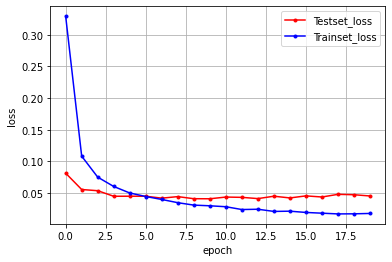

In [16]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Trainset_loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()